# Original Project

In [285]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv("train.csv")

### Step 1: Data Exploration

In [287]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [288]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

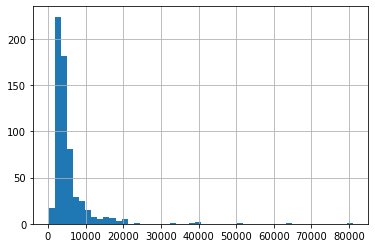

In [289]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

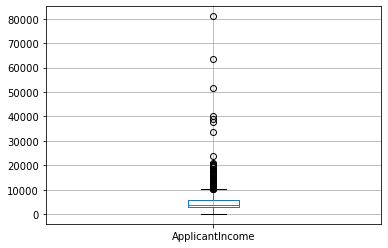

In [290]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

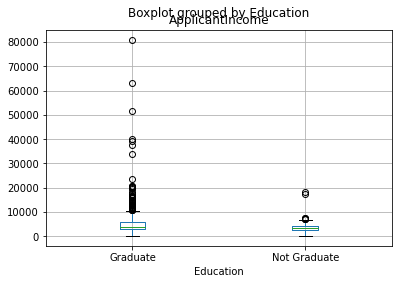

In [291]:
df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

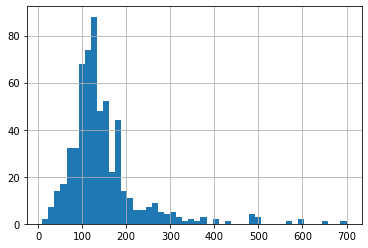

In [292]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

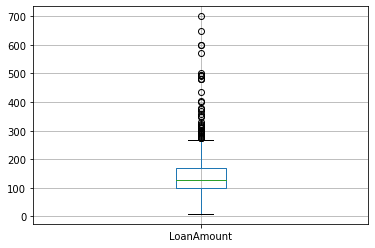

In [293]:
 df.boxplot(column='LoanAmount')

In [294]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

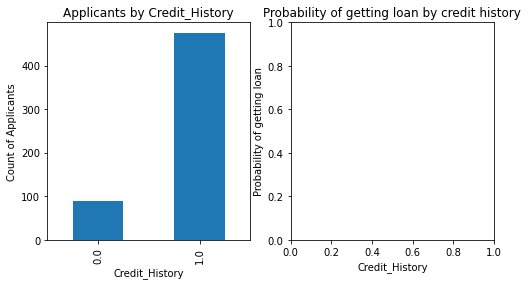

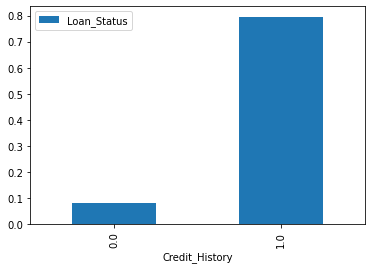

In [295]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

<AxesSubplot:xlabel='Credit_History'>

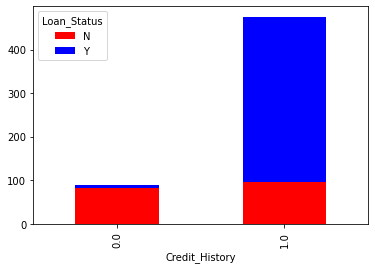

In [296]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Step 2: Data Manipulations

In [297]:
# Check missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [298]:
# Fill in Loan Amount using mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [299]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [300]:
# Fill in Self_Employed by the majority of the value
df['Self_Employed'].fillna('No',inplace=True)

In [301]:
# Deal with extreme values using log transformation to nullify the effect
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [302]:
# Fill in others also by the majority of the value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [303]:
# convert all categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

In [304]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

### Step 3: Modelling

In [305]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5,random_state=None, shuffle=False)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [306]:
# Logictic regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [307]:
# Decision tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [308]:
# Decision tree with different set of variables
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.559%


In [309]:
# Random forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.014%


#### Here we have 100% accuracy meaning we have a overfitting issue, so applying feature importance analysis to reduce features used

In [310]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.274314
TotalIncome_log     0.259896
LoanAmount_log      0.226482
Dependents          0.054548
Property_Area       0.048600
Loan_Amount_Term    0.042295
Education           0.025542
Married             0.025135
Gender              0.021998
Self_Employed       0.021191
dtype: float64


In [311]:
# Only choose the top 5 features
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 81.437%


In [312]:
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################
#################################################################

# Updated Project

In [351]:
df_updated = pd.read_csv("train_update.csv")

### Step 0. Data manipulation Part I
#### Transfer the target varible to categorical variable
##### 1. Find the mean of the "Item_Outlet_Sales" 
##### 2. If one row's Item_Outlet_Sales is greater than the mean, label it as "High", otherwise, "Low"

In [314]:
df_updated_new = df_updated
df_updated_new['Sales'] = 'High'
df_updated_new['ID'] = df_updated_new.index
#means = df_updated.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size","Item_Fat_Content"]).agg({'Item_Outlet_Sales': ['mean', 'min', 'max']}) 
sales_mean = df_updated_new['Item_Outlet_Sales'].mean()


In [315]:
#"Outlet_Type","Outlet_Location_Type","Outlet_Size","Item_Fat_Content"
for index, row in df_updated_new.iterrows():    
    if row["Item_Outlet_Sales"] <= sales_mean:
        row_id = row["ID"]
        df_updated_new.at[row_id,'Sales'] = "Low"
    

In [352]:
len(df_updated)

8523

### Step 1: Data Exploration

In [316]:
df_updated_new.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales,ID
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,High,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low,1
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low,2
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Low,3
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low,4
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Low,5
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Low,6
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,High,7
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Low,8
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,High,9


In [317]:
df_updated_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ID
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,4261.000000
std,4.643456,0.051598,62.275067,8.371760,1706.499616,2460.522505
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,2130.500000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,4261.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,6391.500000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,8522.000000


<AxesSubplot:>

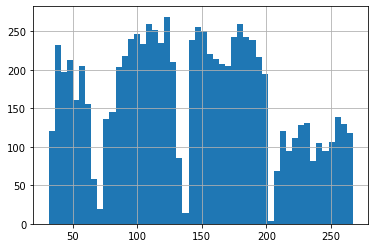

In [318]:
df_updated_new['Item_MRP'].hist(bins=50)

<AxesSubplot:>

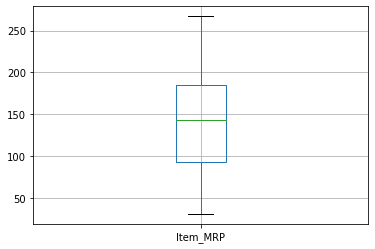

In [319]:
df_updated_new.boxplot(column='Item_MRP')

<AxesSubplot:title={'center':'Item_MRP'}, xlabel='Item_Type'>

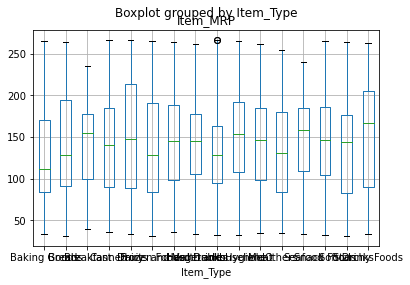

In [320]:
df_updated_new.boxplot(column='Item_MRP', by = 'Item_Type')

<AxesSubplot:>

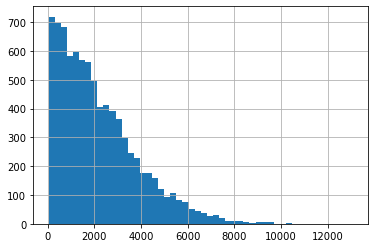

In [321]:
df_updated_new['Item_Outlet_Sales'].hist(bins=50)

<AxesSubplot:>

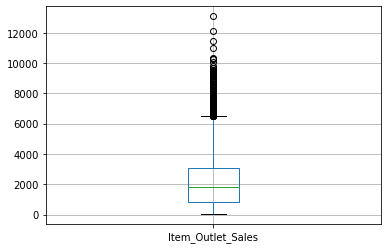

In [322]:
df_updated_new.boxplot(column='Item_Outlet_Sales')

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='[Outlet_Type, Outlet_Location_Type, Outlet_Size, Item_Fat_Content]'>

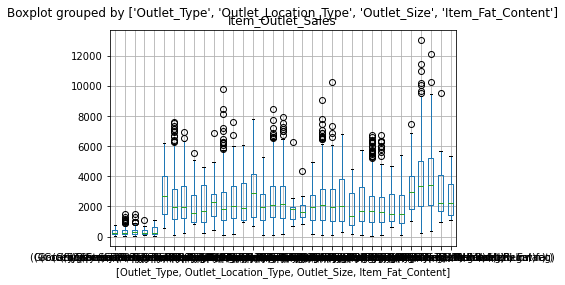

In [323]:
df_updated_new.boxplot(column='Item_Outlet_Sales', by = ["Outlet_Type","Outlet_Location_Type","Outlet_Size","Item_Fat_Content"])


In [324]:
temp1_updated = df_updated_new['Outlet_Size'].value_counts(ascending=True)
temp2_updated = df_updated_new.pivot_table(values='Sales',index=['Outlet_Size'],aggfunc=lambda x: x.map({'High':1,'Low':0}).mean())
print ('Frequency Table for Outlet_Size:') 
print (temp1_updated)

print ('\nProbility of sales amount for each Outlet_Size class:')
print (temp2_updated)


Frequency Table for Outlet_Size:
High       932
Small     2388
Medium    2793
Name: Outlet_Size, dtype: int64

Probility of sales amount for each Outlet_Size class:
                Sales
Outlet_Size          
High         0.456009
Medium       0.512352
Small        0.358878


<AxesSubplot:xlabel='Outlet_Size'>

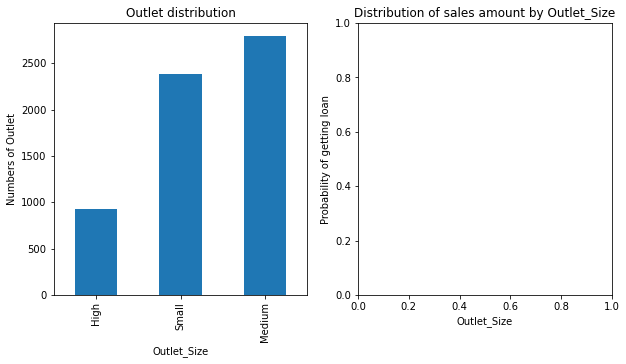

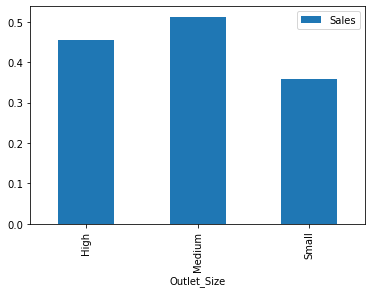

In [325]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.xlabel('Outlet_Size')
plt.ylabel('Numbers of Outlet')
plt.title("Outlet distribution")
temp1_updated.plot(kind='bar')

plt.subplot(122)
plt.xlabel('Outlet_Size')
plt.ylabel('Probability of getting loan')
plt.title("Distribution of sales amount by Outlet_Size")
temp2_updated.plot(kind = 'bar')

<AxesSubplot:xlabel='Outlet_Size'>

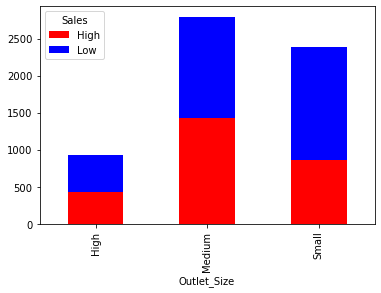

In [326]:
temp3_updated = pd.crosstab(df_updated_new['Outlet_Size'], df_updated_new['Sales'])
temp3_updated.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Step 2: Data Manupulation Part II
#### Missing data

In [327]:
# Check missing values at the beginning
df_updated_new.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Sales                           0
ID                              0
dtype: int64

In [328]:
# Fill in Item_Weight using mean
df_updated_new['Item_Weight'].fillna(df_updated_new['Item_Weight'].mean(), inplace=True)


In [329]:
#Drop all the missing Outlet_Size
df_updated_new.dropna(inplace=True)

In [353]:
len(df_updated_new)

6113

In [330]:
# convert all categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Sales']
le = LabelEncoder()
for i in var_mod:
    df_updated_new[i] = le.fit_transform(df_updated_new[i])
df_updated_new.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Sales                          int64
ID                             int64
dtype: object

In [331]:
df_updated_new.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Sales                          int64
ID                             int64
dtype: object

In [332]:
# Double Check NO missing values at all
df_updated_new.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Sales                        0
ID                           0
dtype: int64

### Step 3: Modelling

In [340]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5,random_state=None, shuffle=False)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [341]:
# Logistic regression
outcome_var = 'Sales'
model = LogisticRegression()
predictor_var = ['Item_Weight','Item_Type','Item_MRP','Outlet_Size']
classification_model(model, df_updated_new,predictor_var,outcome_var)


Accuracy : 73.728%
Cross-Validation Score : 73.663%


In [342]:
# Decision tree
model = DecisionTreeClassifier()
predictor_var = ['Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Size','Outlet_Type']
classification_model(model, df_updated_new,predictor_var,outcome_var)

Accuracy : 99.853%
Cross-Validation Score : 71.536%


In [343]:

# Decision tree with different set of variables
predictor_var = ['Item_Weight','Item_Type','Item_MRP','Outlet_Size']
classification_model(model, df_updated_new,predictor_var,outcome_var)



Accuracy : 99.738%
Cross-Validation Score : 72.191%


In [344]:
# Random forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Size','Outlet_Type']
classification_model(model, df_updated_new,predictor_var,outcome_var)

Accuracy : 99.853%
Cross-Validation Score : 77.163%


### Here we have a very high accuracy. Even though its not the same as the original project, it is still significantly high for us to consider overfitting issue, so applying feature importance analysis to reduce features used

In [345]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Item_MRP            0.560319
Item_Weight         0.174155
Outlet_Type         0.117060
Item_Type           0.084882
Item_Fat_Content    0.032844
Outlet_Size         0.030741
dtype: float64


In [354]:
# Decision tree with top 2 features
model = DecisionTreeClassifier()
predictor_var = ['Item_MRP','Outlet_Type']
classification_model(model, df_updated_new,predictor_var,outcome_var)

Accuracy : 97.072%
Cross-Validation Score : 72.501%


In [347]:
# Only choose the top 3 features
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Item_MRP','Outlet_Type','Item_Weight']
classification_model(model, df_updated_new,predictor_var,outcome_var)

Accuracy : 80.942%
Cross-Validation Score : 79.814%
